# Ekstrak geometri sumber gempa dari data shp

Jalankan file ini di jupyter dengan cara mengubah kernel ke `maps`. Jika kernel `maps` belum ada, lakukan langkah-langkah berikut ini:

1. Buka Anaconda Prompt
2. Buat environment baru: `conda create -n maps python=3.9`
3. Aktifkan environment `maps`: `conda activate maps`
4. Install `geopandas`: `pip install geopandas`
5. Install `matplotlib`: `pip install matplotlib`
6. Install `ipykernel`: `pip install ipykernel`
7. Daftarkan ke dalam kernel: `python -m ipykernel install --name "maps" --display-name "maps"`

Data yang disimpan dalam format shp dapat digunakan di QGIS

## 1. Import packages dan variabel tambahan

In [1]:
# packages
from custom_maps import *

# open coastal area
shp_coast = gpd.read_file('./coastlines/ne_10m_land.shp')

# folder penyimpanan
dir_figs = os.path.join(os.getcwd(), 'figs')
os.makedirs(dir_figs, exist_ok=True)

## 3. Patahan

In [2]:
# open faults
gdf_faults = gpd.read_file('./shp/faults.shp')
# print(gdf_faults["Fault_Na_1"].to_string())
print(gdf_faults["Segment__1"].to_string())

0      KumeringNorth
1      KumeringSouth
2    Semangkobarat-A
3    SemangkoTimur-A
4    Semangkobarat-B
5    SemangkoTimur-B
6     SemangkoGraben
7            Enggano


In [3]:
# LAKUKAN SECARA MANUAL
### konfigurasi patahan (cek berdasarkan indeks di atas) ###

dict_config = {
    "merged": [
        [0,1,2,3,4,5,6]
    ],
    "individual": [
        7
    ],
    "merged_depth": [
        20
    ],
    "individual_depth": [
        20
    ]
}

############################################################

fault_geoms, dict_faults = select_faults(gdf_faults, dict_config)

# simpan geometri ke dalam file pkl
variable_to_pkl(fault_geoms, 'tmp_OQ003_fault_geoms.pkl')
variable_to_pkl(dict_faults, 'dict_faults.pkl')

**catatan:**

konfigurasi patahan (cek berdasarkan indeks gdf_faults)
```python
dict_config = {
    "merged": [
        [0,1,2,3,4,5,6],
        [7,8]
    ],
    "individual": [
        9,10,11
    ],
    "merged_depth": [
        20,
        30
    ],
    "individual_depth": [
        20,20,30
    ]
}
```

contoh konfigurasi apabila diantaranya tidak ada
```python
dict_config = {
    "merged": [
        [0,1,2,3],
        [4,5,6]
    ],
    "individual": None,
    "merged_depth": [
        20,
        30
    ],
    "individual_depth": None
}
```
atau
```python
dict_config = {
    "merged": None,
    "individual": [
        0,1,2,3,4,5,6,7
    ],
    "merged_depth": None
    "individual_depth": [
        20,20,20,20,20,20,20,20
    ]
}
```

## 4. Megathrust

In [4]:
# open megathrust
gdf_megathrusts = gpd.read_file('./shp/megathrusts.shp')
print(gdf_megathrusts)

   OBJECTID   Id Name  Shape_Leng  Shape_Area  \
0       4.0  0.0   M6    8.030056    3.838513   
1       7.0  0.0   M7    9.898832    4.603134   

                                            geometry  
0  POLYGON ((100.78291 -5.14698, 102.10096 -4.228...  
1  POLYGON ((102.43611 -7.01734, 103.64118 -5.842...  


memilih 6 dari [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


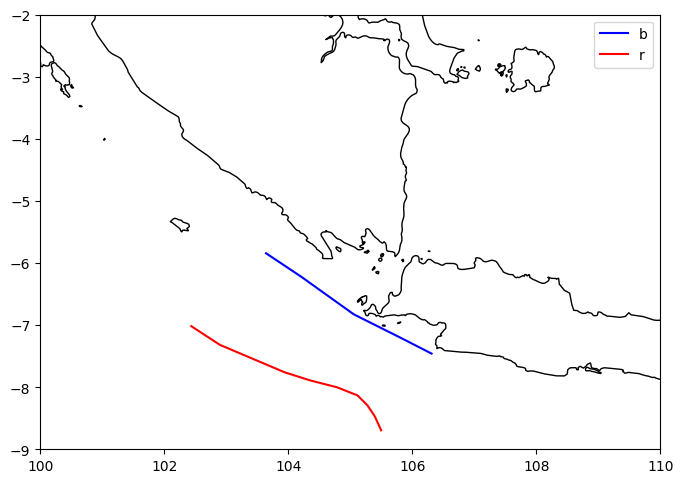

In [5]:
# LAKUKAN SECARA MANUAL
### bagian yang di edit ###

# bagian ini lihat indeks megathrust yang dicari berdasarkan print sebelumnya
megathrust_ke = 1                # --> nilai ini disimpan di bagian bawah

# bagian ini berfungsi memisahkan garis merah dan garis biru
indeks_pemisah = 6               # --> nilai ini disimpan di bagian bawah

# skipped_indices digunakan apabila garis merah dan garis biru tidak terpisah dengan nilai default
# terdiri dari [indeks pertama, indeks terakhir]
# indeks pertama dimulai dari 0, 1, 2, ...
# indeks terakhir dimulai dari None, -1, -2, ...
skipped_indices = [1, None]      # --> nilai ini disimpan di bagian bawah

map_limit = (
    (-9, -2),
    (100, 110)
)

###########################

# matplotlib
fig, ax = plt.subplots(figsize=(8,8))

# plot basemap
shp_coast.plot(color='none', edgecolor='black', linewidth=1, ax=ax)

# check polygon
check_megathrust_delimiter(gdf_megathrusts, idx=megathrust_ke, delimiter_number=indeks_pemisah, ax=ax,
                          skipped_indices=skipped_indices, map_limit=map_limit)

# belum di edit koordinatnya

In [6]:
# LAKUKAN SECARA MANUAL
### Masukkan hasil indeks pemisah pada masing-masing megathrust di sini #######
### Kode warna bagian atas dapat dilihat pada gambar di atas (lihat legenda) ##

indeks_pemisah_masing2_megathrust = [4, 6]

kode_warna_bagian_atas = ['r', 'r']

skipped_indices = [
    [1, None],
    [1, None],
]

###############################################################################

megathrust_geoms = create_megathrust_coords(gdf_megathrusts, indeks_pemisah_masing2_megathrust,
                                           skipped_indices, kode_warna_bagian_atas, upper_depth=0, lower_depth=50)
print("terdapat", len(megathrust_geoms), "megathrust")

# simpan geometri megathrust ke file pkl
variable_to_pkl(megathrust_geoms, "tmp_OQ003_megathrust_geoms.pkl")

terdapat 2 megathrust


Contoh untuk kasus 3 megathrust dengan skipped_indices yang berbeda:

```python
indeks_pemisah_masing2_megathrust = [11, 6, 12]

kode_warna_bagian_atas = ['b', 'r', 'b']

skipped_indices = [
    [1, -1],
    [1, -1],
    [1, -2]
]
```

## 5. Shallow Background

In [7]:
# LANGSUNG JALANKAN SAJA (setelah mengganti nama file)
# open shallow background
gdf_shallow_background = gpd.read_file('./shp/shallow_background.shp')

shallow_background_geoms = [
    geom.exterior.xy for geom in gdf_shallow_background.geometry
]

variable_to_pkl(shallow_background_geoms, "tmp_OQ003_shallow_background_geoms.pkl")

## 6. Deep Background (intraslab)

In [8]:
# LANGSUNG JALANKAN SAJA (setelah mengganti nama file)
# open deep background
gdf_deep_background = gpd.read_file('./shp/deep_background.shp')

deep_background_geoms = [
    geom.exterior.xy for geom in gdf_deep_background.geometry
]

variable_to_pkl(deep_background_geoms, "tmp_OQ003_deep_background_geoms.pkl")